<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QuantumTeleportation_01_Gemini_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-5wig5zux
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-5wig5zux
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [14]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

In [16]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(2, 'c')
cr_result = ClassicalRegister(1, 'result')
qc = QuantumCircuit(qr, cr, cr_result, name='teleportation')

In [17]:
qc.h(qr[1])
qc.cx(qr[1], qr[2])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [18]:
# 예시: 텔레포트할 큐비트를 |1> 상태로 초기화
qc.x(qr[0])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [19]:
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [20]:
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [21]:
qc.x(qr[2]).c_if(cr[1], 1)  # cr[1]이 1이면 X 게이트 적용
qc.z(qr[2]).c_if(cr, 1)  # cr이 1이면 Z 게이트 적용
qc.barrier()
qc.measure(qr[2], cr_result)

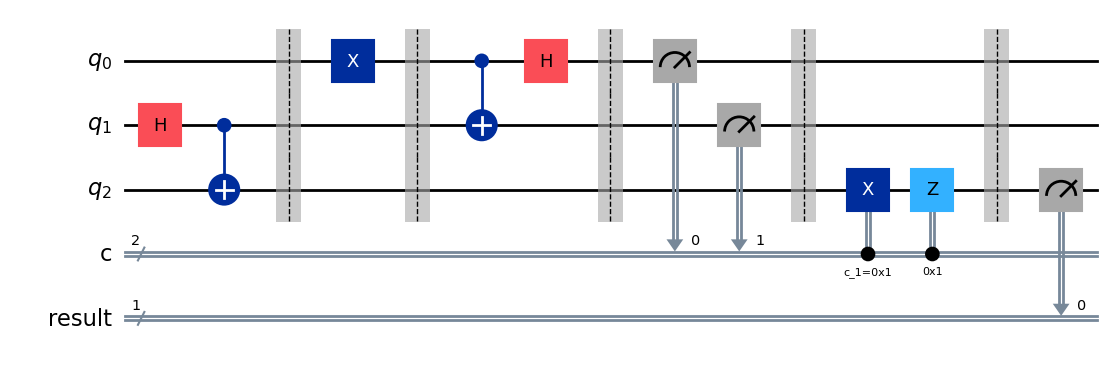

In [22]:
qc.draw('mpl')

In [23]:
simulator = Aer.get_backend("qasm_simulator")
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("\n시뮬레이션 결과:", counts)


시뮬레이션 결과: {'1 11': 268, '1 10': 259, '1 00': 224, '1 01': 273}


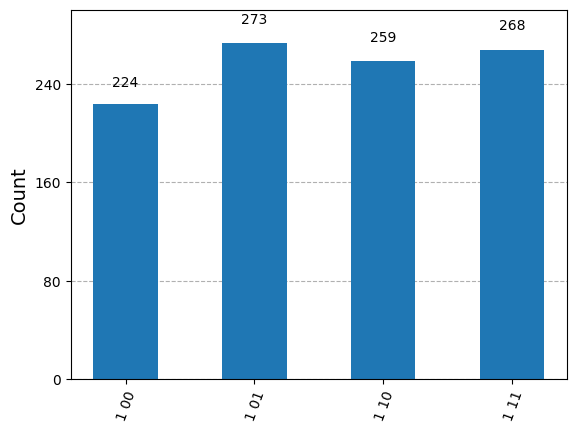

In [24]:
plot_histogram(counts)

# 결과를 해석하는 법

# 위 결과 중 두번째와 "101"과 마지막 "111"의 경우 큐빗 순서는 q[2], q[1], q[0] 순입니다. 즉, 마지막 숫자가 "1", q[0]가 "1"인 경우는 반드시 첫번째 숫자는 "1"입니다. 마지막 숫자가 "0"인 경우는 무시하면 됨